## Proyecto: Población Mundial
#### Métodos Numéricos II
---

#### Lectura de datos

Leemos el dataset provisto y seleccionamos las columnas de datos identificadas como relevantes.

In [ ]:
import pandas as pd

datosPoblacionales = pd.read_csv('countries-table.csv')
datosPoblacionales = datosPoblacionales[['country','pop1980','pop2000','pop2010','pop2023','pop2024','pop2030','pop2050','landAreaKm','netChange','growthRate','worldPercentage','density']]
display(datosPoblacionales)

,country,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,netChange,growthRate,worldPercentage,density
0,India,687354000,1057920000,1243480000,1438070000,1450940000,1525140000,1679590000,2973190.00,0.4119,0.0089,0.1813,488.0078
1,China,983164000,1269580000,1351560000,1422580000,1419320000,1398150000,1260290000,9424702.90,-0.1006,-0.0023,0.1773,150.5957
2,United States,229859000,281484000,311063000,343477000,345427000,355650000,380847000,9147420.00,0.0600,0.0057,0.0432,37.7622
3,Indonesia,148951000,216078000,246305000,281190000,283488000,295877000,320713000,1877519.00,0.0719,0.0082,0.0354,150.9907
4,Pakistan,82291000,154879000,199239000,247504000,251269000,276883000,371864000,770880.00,0.1225,0.0152,0.0314,325.9509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,11339,5029,4794,4420,4389,4202,3692,102.00,NaN,-0.0070,NaN,43.0294
230,Falkland Islands,2252,3097,3197,3477,3470,3422,3176,12173.00,NaN,-0.0020,NaN,0.2851
231,Tokelau,1664,1845,1585,2397,2506,2985,3821,10.00,0.0000,0.0455,NaN,250.6000
232,Niue,3533,2047,1768,1817,1819,1835,1966,261.00,NaN,0.0011,NaN,6.9693


234


#### Gráficas de datos poblacionales 10 países

Para visualizar los datos, tomaremos un conjunto de paises de referencia y graficamos la población de cada uno en los años 1980 a 2024. 

,country,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,netChange,growthRate,worldPercentage,density
17,Turkey,45408800,65426000,73346800,87270500,87473800,89027500,91258100,783562.0,0.0065,0.0023,0.0109,111.6361
21,Tanzania,19189800,34260100,44758500,66617600,68560200,80913100,129621000,885800.0,0.0622,0.0292,0.0086,77.3992
27,Colombia,26104500,39089900,44777300,52321200,52886400,55736500,59385400,1109500.0,0.0175,0.0108,0.0066,47.6669
84,Dominican Republic,5729040,8584190,9820180,11331300,11427600,11938900,12996300,48310.0,0.0030,0.0085,0.0014,236.5473
106,Kyrgyzstan,3729370,5025140,5491760,7073520,7186010,7803620,9642950,191800.0,0.0035,0.0159,0.0009,37.4662
127,Kuwait,1504780,1954710,2943370,4838780,4934510,5324200,6367760,17820.0,0.0032,0.0198,0.0006,276.9085
155,Estonia,1476460,1397000,1331450,1367200,1360550,1302770,1174270,42750.0,-0.0004,-0.0049,0.0002,31.8257
195,Aruba,62039,88761,100114,107939,108066,107864,100002,180.0,0.0000,0.0012,0.0000,600.3667
198,Saint Vincent and the Grenadines,104213,113545,109959,101323,100616,96856,88942,390.0,0.0000,-0.0070,0.0000,257.9897
207,Greenland,50111,56209,56614,55922,55840,55050,49898,410450.0,0.0000,-0.0015,0.0000,0.1360


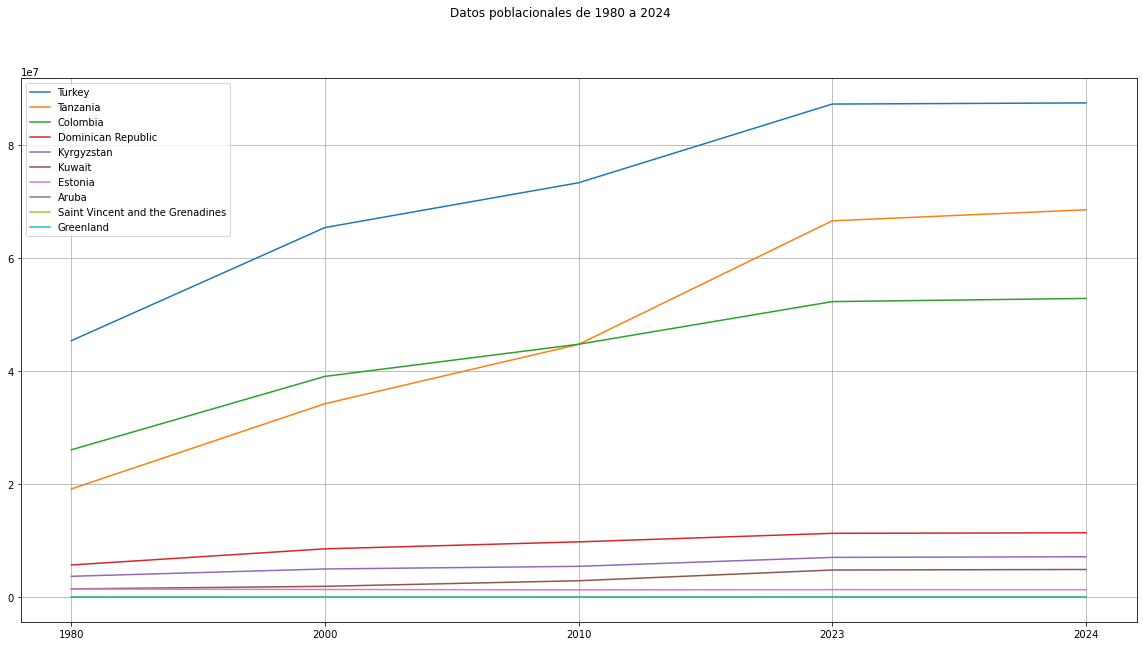

In [80]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

# Para seleccionar países al azar, comentar la linea indices = [i for i in range(10)]
indices = []
for i in range(10):
    indiceAleatorio = randrange(datosPoblacionales.index.size)
    while indiceAleatorio in indices:
        indiceAleatorio = randrange(datosPoblacionales.index.size)
    indices.append(randrange(234))

#indices = [i for i in range(10)]

datosPoblacionales10Paises = datosPoblacionales[datosPoblacionales.index.isin(indices)]
display(datosPoblacionales10Paises)

anios = ['1980','2000','2010','2023','2024']

plt.figure(figsize=(20, 10),facecolor='w')
plt.suptitle('Datos poblacionales de 1980 a 2024')
plt.grid()

for pais in datosPoblacionales10Paises['country']:
    datosPais = datosPoblacionales10Paises[datosPoblacionales10Paises['country'] == pais]
    plt.plot(anios, datosPais[['pop1980','pop2000','pop2010','pop2023','pop2024']].values.flatten(), label=pais)
    plt.legend()
    

#### Evaluación del ajuste de los datos al modelo usando regresión lineal

El modelo de Malthus es el siguiente: 

$$P(t) = P_0 e^{rt} $$

con $r$ tasa de crecimiento, $P_0$ población y $t$ tiempo en años. Para el análisis, convertiremos el dato de "año" en diferencia en años desde 1980.  



In [82]:
# Renombramos columnas de año a que corresponden datos poblacionales
diferenciasEnAniosDesde1980 = [0,20,30,43,44] 
columnasARenombrar = ['pop1980','pop2000','pop2010','pop2023','pop2024']

renombrarColumnas = dict(zip(columnasARenombrar,diferenciasEnAniosDesde1980))
datosPoblacionales10Paises.rename(columns=renombrarColumnas,inplace=True)

display(datosPoblacionales10Paises)

d:\anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,country,0,20,30,43,44,pop2030,pop2050,landAreaKm,netChange,growthRate,worldPercentage,density
17,Turkey,45408800,65426000,73346800,87270500,87473800,89027500,91258100,783562.0,0.0065,0.0023,0.0109,111.6361
21,Tanzania,19189800,34260100,44758500,66617600,68560200,80913100,129621000,885800.0,0.0622,0.0292,0.0086,77.3992
27,Colombia,26104500,39089900,44777300,52321200,52886400,55736500,59385400,1109500.0,0.0175,0.0108,0.0066,47.6669
84,Dominican Republic,5729040,8584190,9820180,11331300,11427600,11938900,12996300,48310.0,0.0030,0.0085,0.0014,236.5473
106,Kyrgyzstan,3729370,5025140,5491760,7073520,7186010,7803620,9642950,191800.0,0.0035,0.0159,0.0009,37.4662
127,Kuwait,1504780,1954710,2943370,4838780,4934510,5324200,6367760,17820.0,0.0032,0.0198,0.0006,276.9085
155,Estonia,1476460,1397000,1331450,1367200,1360550,1302770,1174270,42750.0,-0.0004,-0.0049,0.0002,31.8257
195,Aruba,62039,88761,100114,107939,108066,107864,100002,180.0,0.0000,0.0012,0.0000,600.3667
198,Saint Vincent and the Grenadines,104213,113545,109959,101323,100616,96856,88942,390.0,0.0000,-0.0070,0.0000,257.9897
207,Greenland,50111,56209,56614,55922,55840,55050,49898,410450.0,0.0000,-0.0015,0.0000,0.1360


Para evaluar si los datos se ajustan al modelo de Malthus, podemos graficarlos en escala logarítmica y evaluar si las gráficas de cada uno se ajustan a una recta. Tengamos en cuenta que el modelo de Malthus se puede linealizar de la siguiente forma, resultando como parámetros de la recta de regresión los que se indican a continuación:

$$P(t) = P_0 e^{rt} $$
$$ln(P) = ln(P_0 e^{rt}) $$
$$ln(P) = ln(P_0)+ln(e^{rt}) $$
$$ln(P) = ln(P_0)+rt $$

con parámetros $\begin{cases} b = ln(P_0) \\ m = r \end{cases}$ para la recta $y = mt + b$ con $y=ln(P)$.




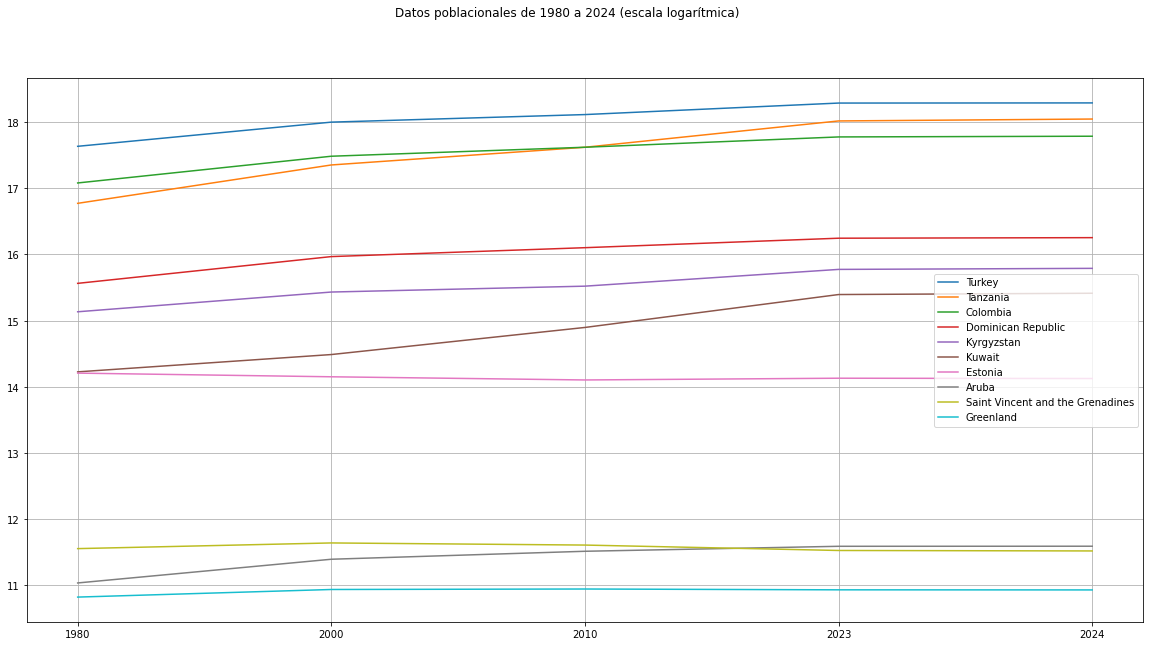

In [87]:
# Grafico en escala logarítmica
plt.figure(figsize=(20, 10),facecolor='w')
plt.suptitle('Datos poblacionales de 1980 a 2024 (escala logarítmica)')
plt.grid()

for pais in datosPoblacionales10Paises['country']:
    datosPais = datosPoblacionales10Paises[datosPoblacionales10Paises['country'] == pais]
    plt.plot(anios, np.log(datosPais[diferenciasEnAniosDesde1980]).values.flatten(), label=pais)
    plt.legend()

Podemos observar que para los datos de la mayoría de los países es posible ajustar un recta. Para los datos de cada país, ajustamos rectas usando la librería sklearn.linear_model, clase LinearRegression.

In [88]:
from sklearn.linear_model import LinearRegression

---

## Notas de pruebas anteriores

#### Modelo de Malthus (linealización)

$$P(t) = P_0 e^{rt} $$
$$ln(P) = ln(P_0 e^{rt}) $$
$$ln(P) = ln(P_0)+ln(e^{rt}) $$
$$ln(P) = ln(P_0)+rt $$

In [1]:
import numpy as np

def valoresModeloMalthus(poblacion_inicial, tasa_crecimiento, tiempo):
    return poblacion_inicial * np.exp(tasa_crecimiento * tiempo)

# Gráfica de datos de distintos países
columnasTiempo = [0,20,30,43,44] # tomamos 1980 como t = 0, desde allí el resto son cantidad de años desde 1980 al año correspondiente.

datosConTiempo = datosPoblacionales[['pop1980','pop2000','pop2010','pop2023','pop2024']]

renombrarColumnas = dict(zip(datosConTiempo.columns,columnasTiempo))
datosConTiempo.rename(columns=renombrarColumnas,inplace=True)

datosConTiempo['pais'] = datosPoblacionales['country']
datosConTiempo['tasaCrecimiento'] = datosPoblacionales['growthRate']
datosConTiempo['tasaCrecimientoComparacion'] = np.log(datosPoblacionales['pop2050']/datosPoblacionales['pop1980'])/100 # para comparar con la tasa de crecimiento del data set
display(datosConTiempo)


NameError: name 'datosPoblacionales' is not defined

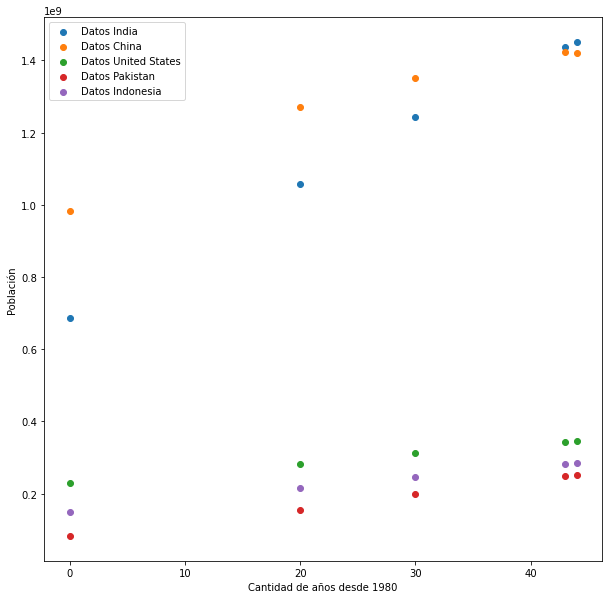

In [53]:
paises = ['India','China','United States','Pakistan','Indonesia']

plt.figure(figsize=(10,10),facecolor='w')

for pais in paises: 
    datosPais = datosConTiempo[datosConTiempo['pais'] == pais]
    tasaCrecimientoPais = datosPais['tasaCrecimiento'].values[0]
    datosPais = datosPais.drop(columns=['pais','tasaCrecimiento','tasaCrecimientoComparacion'])

    plt.scatter(datosPais.columns,datosPais.values[0],label='Datos '+pais)
    plt.xlabel('Cantidad de años desde 1980')
    plt.ylabel('Población')
    plt.legend()

In [ ]:
import matplotlib.pyplot as plt

paises = datosConTiempo['pais'].values

for pais in paises: 
    datosPais = datosConTiempo[datosConTiempo['pais'] == pais]
    tasaCrecimientoPais = datosPais['tasaCrecimiento'].values[0]
    datosPais = datosPais.drop(columns='pais')
    datosPais = datosPais.drop(columns='tasaCrecimiento')

    plt.figure(figsize=(10,5),facecolor='w')
    plt.scatter(datosPais.columns,datosPais.values[0],label='Datos '+pais)
    plt.plot(datosPais.columns, valoresModeloMalthus(datosPais.values[0][0],tasaCrecimientoPais,datosPais.columns),label='Modelo Malthus')
    plt.title('Población de '+pais )
    plt.xlabel('Cantidad de años desde 1980')
    plt.ylabel('Población')
    plt.legend()





---

#### Reunión 10/11 

##### Pruebas con scipy.integrate